# Laboratori 3A


L'objectiu d'aquest notebook és jugar amb la transformada de Fourier en dues dimensions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import skimage

In [2]:
def display_gray_256(img): 
    plt.imshow(img, cmap = "gray", vmin = 0, vmax = 255)

In [3]:
def fourier (image):
    ft = np.fft.ifftshift(image)
    ft = np.fft.fft2(ft)
    ft = np.fft.fftshift(ft)
    return ft

In [4]:
def inverse_fourier (ft):
    ift = np.fft.ifftshift(ft)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    return ift.real

In [11]:
def display_fourier(ft):
    plt.imshow(np.log(abs(ft)), cmap="hot", vmin = -1, vmax = 16)

## Tasca 1 - Animació de la descomposició

Aquesta animació ve de la pàgina https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/

Modifica el codi de manera que les freqüències que contribueixen més a la imatge s'afegeixin primeres.

In [5]:
cube = skimage.io.imread('https://sp.apolloboxassets.com/vendor/product/productImages/2023-03-22/MeMxpArray_11.jpg', as_gray = True)
cube = skimage.util.img_as_ubyte(cube)  # Convert to bytes from floats

In [6]:
from IPython.display import display, clear_output

In [7]:
def calculate_distance_from_centre(coords, centre):
    # Distance from centre is √(x^2 + y^2)
    return np.sqrt(
        (coords[0] - centre) ** 2 + (coords[1] - centre) ** 2
    )

In [8]:
def find_symmetric_coordinates(coords, centre):
    return (centre + (centre - coords[0]),
            centre + (centre - coords[1]))

In [9]:
def display_plots(individual_grating, reconstruction, idx):
    clear_output(wait=True)
    plt.subplot(121)
    plt.imshow(individual_grating)
    plt.axis("off")
    plt.subplot(122)
    plt.imshow(reconstruction)
    plt.axis("off")
    plt.suptitle(f"Terms: {idx}")
    plt.pause(0.001)

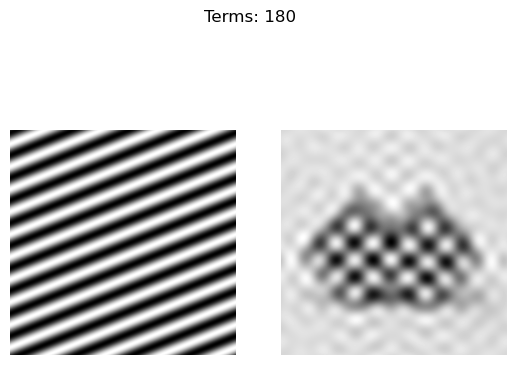

In [ ]:
image = cube[:-1,:-1]  # el codi funciona millor amb imatges de dimensions senars


# Array dimensions (array is square) and centre pixel
array_size = len(image)
centre = int((array_size - 1) / 2)


# Get all coordinate pairs in the left half of the array,
# including the column at the centre of the array (which
# includes the centre pixel)
coords_left_half = (
    (x, y) for x in range(array_size) for y in range(centre+1)
)

ft = fourier(image)
logft = np.log(abs(ft))

# Sort points based on distance from centre
coords_left_half = sorted(
    coords_left_half,
    key=lambda x: calculate_distance_from_centre(x, centre)
)

plt.set_cmap("gray")


# Show grayscale image and its Fourier transform
plt.subplot(121)
#plt.imshow(image)
display_gray_256(image)
plt.axis("off")
plt.subplot(122)
#plt.imshow(np.log(abs(ft)))
display_fourier(ft)
plt.axis("off")
plt.pause(2)


# Step 1
# Set up empty arrays for final image and
# individual gratings
rec_image = np.zeros(image.shape)
individual_grating = np.zeros(
    image.shape, dtype="complex"
)
idx = 0


# Step 2
for coords in coords_left_half:
    # Central column: only include if points in top half of
    # the central column
    if not (coords[1] == centre and coords[0] > centre):
        idx += 1
        symm_coords = find_symmetric_coordinates(
            coords, centre
        )
        # Step 3
        # Copy values from Fourier transform into
        # individual_grating for the pair of points in
        # current iteration
        individual_grating[coords] = ft[coords]
        individual_grating[symm_coords] = ft[symm_coords]

        # Step 4
        # Calculate inverse Fourier transform to give the
        # reconstructed grating. Add this reconstructed
        # grating to the reconstructed image
        rec_grating = inverse_fourier(individual_grating)
        rec_image += rec_grating

        # Clear individual_grating array, ready for
        # next iteration
        individual_grating[coords] = 0
        individual_grating[symm_coords] = 0

        display_plots(rec_grating, rec_image, idx)
        

plt.show()

## Tasca 2 - Imatges híbrides

Crea una o més imatges híbrides i ensenya el procés de generar-les.